## **What is Matplotlib?**
- It's the "grandfather" of Python data visualization libraries. It is powerful, highly customizable, but can sometimes be a bit verbose.
- Why learn it first? Many other high-level libraries (like Seaborn) are built on top of Matplotlib. Understanding Matplotlib's core concepts—the Figure and the Axes—gives you the power to customize any plot, no matter which library you use to create it. This is a critical skill.

## **The Two Matplotlib APIs**
- **Pyplot API (State-based):** A collection of functions (plt.plot(), plt.title(), etc.) that operate on a "current" figure/axes. It's quick for simple plots but can be confusing for complex ones.
- **Object-Oriented (OO) API (State-less):** The recommended, more powerful approach. You explicitly create Figure and Axes objects and call methods on them (e.g., ax.plot(), ax.set_title()). This is the API we will focus on to build professional skills.

## **1. Your First Plot (The Object-Oriented Way)**
The fundamental structure of a Matplotlib plot is:
- **A Figure object:** The top-level container for everything (the entire window or page).
- **One or more Axes objects:** The individual plot(s) inside the figure (the area with the x-axis, y-axis, etc.). Note: Axes is the object, axis refers to the x/y-axis.

**Setup:**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# This line is a "magic command" specific to Jupyter Notebook/Lab.
# It ensures that your plots are displayed directly in the notebook output.
%matplotlib inline

**The OO Workflow:**

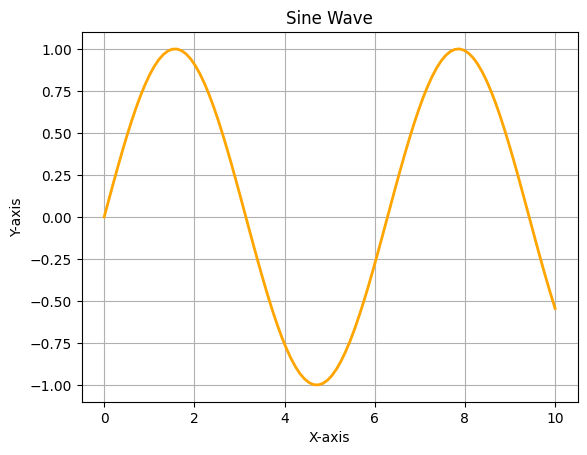

In [2]:
# 1. Prepare some data
x = np.linspace(0, 10, 100) # 100 points from 0 to 10
y = np.sin(x)
z = np.cos(x)

# 2. Create a Figure and an Axes object
# fig, ax = plt.subplots() is the standard way to start.
# It creates a Figure and a single Axes in one command.
fig, ax = plt.subplots()

# 3. Plot data on the Axes
ax.plot(x, y, color ="orange", linewidth = "2")

# 4. Customize the plot by calling methods on the Axes
ax.set_title("Sine Wave")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.grid(True) # Add a grid

# 5. Show the plot (in scripts, this is necessary; in notebooks, it's often optional but good practice)
plt.show()

## **2. Creating Multiple Plots (Subplots)**
The real power of the OO API shines when you create multiple plots in a single figure.

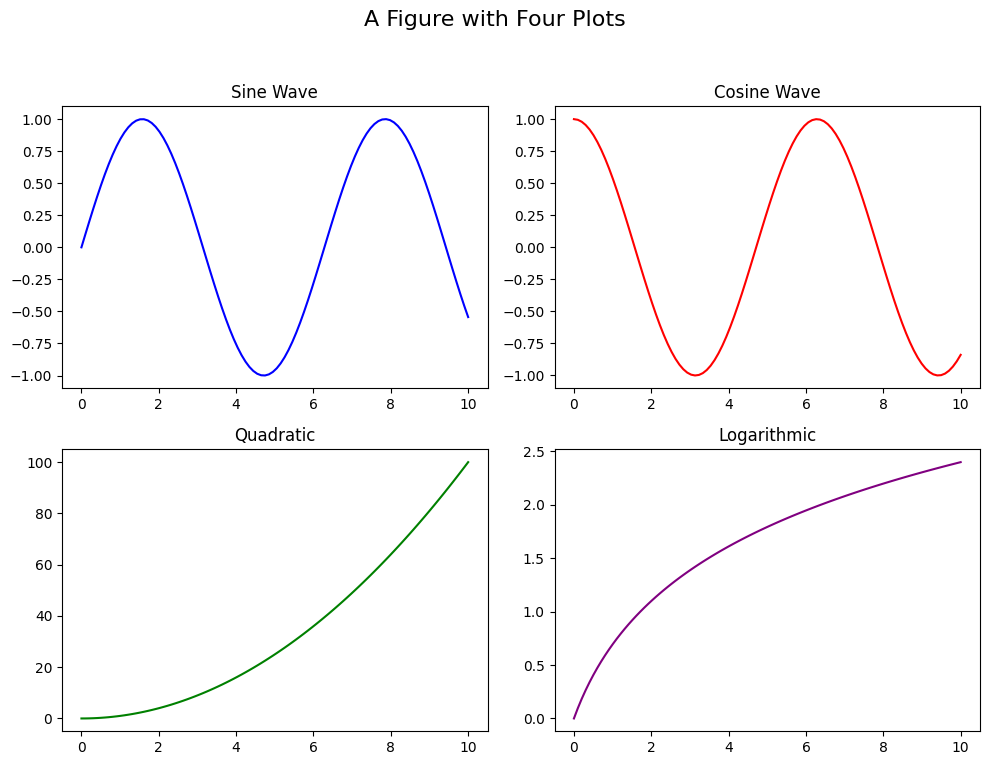

In [3]:
# Create a figure and a 2x2 grid of Axes objects
# The 'ax' variable will now be a 2D NumPy array of Axes objects.
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8)) # figsize is in inches

# ax[0, 0] is the top-left plot
ax[0, 0].plot(x, y, color='blue')
ax[0, 0].set_title('Sine Wave')

# ax[0, 1] is the top-right plot
ax[0, 1].plot(x, z, color='red')
ax[0, 1].set_title('Cosine Wave')

# ax[1, 0] is the bottom-left plot
ax[1, 0].plot(x, x**2, color='green')
ax[1, 0].set_title('Quadratic')

# ax[1, 1] is the bottom-right plot
ax[1, 1].plot(x, np.log(x + 1), color='purple')
ax[1, 1].set_title('Logarithmic')

# Add a title for the entire Figure
fig.suptitle('A Figure with Four Plots', fontsize=16)

# Improve layout to prevent titles/labels overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # rect values: (left, bottom, right, top)

plt.show()

## **3. Common Plot Types**
Let's use the OO API (ax.plot_type()) for these.

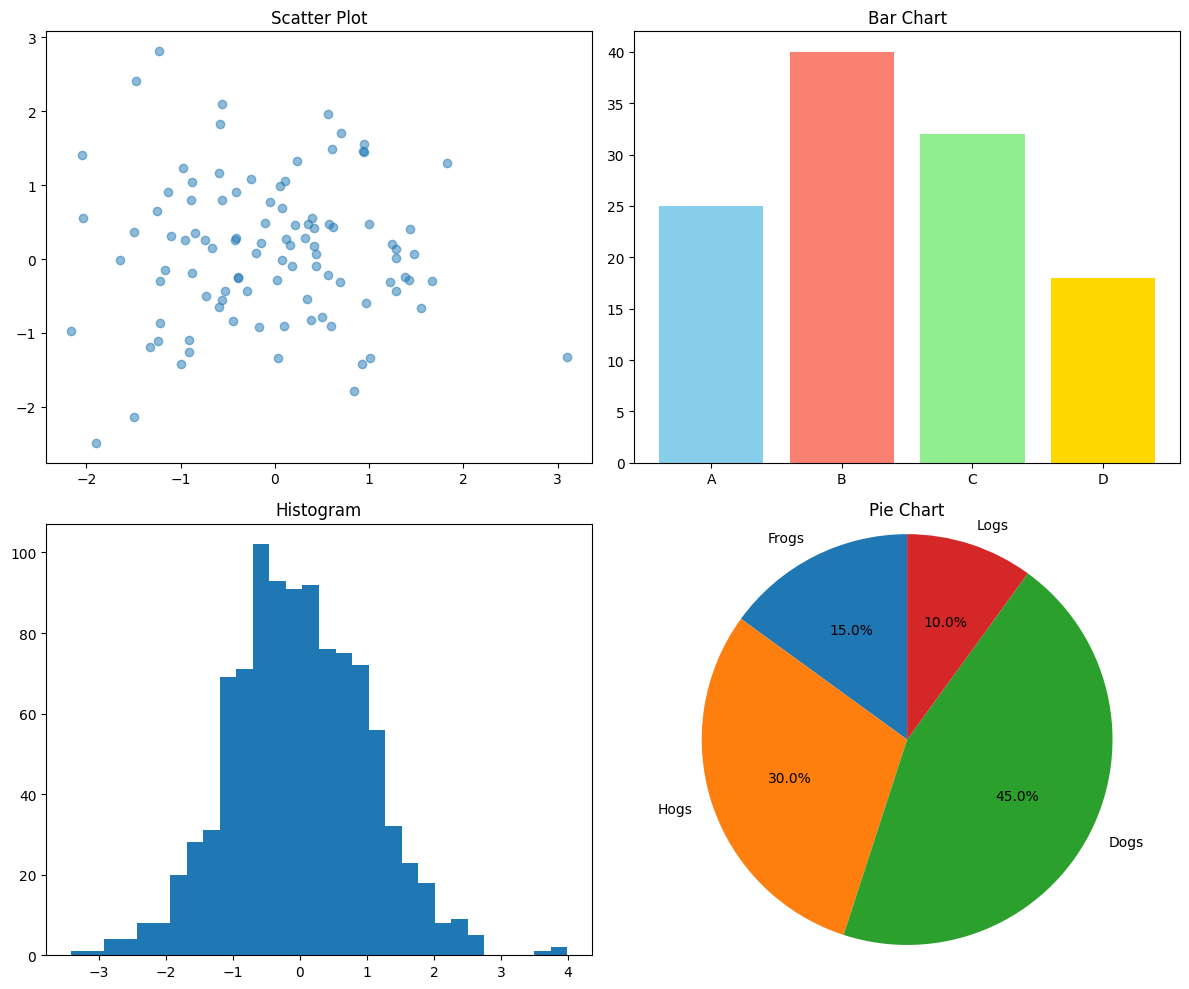

In [4]:
# Setup for new plots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# --- Scatter Plot ---
# Useful for showing the relationship between two variables.
x_rand = np.random.randn(100)
y_rand = np.random.randn(100)
ax[0, 0].scatter(x_rand, y_rand, alpha=0.5) # alpha sets transparency
ax[0, 0].set_title('Scatter Plot')

# --- Bar Chart ---
# Useful for comparing quantities across categories.
categories = {'A': 25, 'B': 40, 'C': 32, 'D': 18}
ax[0, 1].bar(categories.keys(), categories.values(), color=['skyblue', 'salmon', 'lightgreen', 'gold'])
ax[0, 1].set_title('Bar Chart')

# --- Histogram ---
# Useful for showing the distribution of a single variable.
data_normal = np.random.randn(1000)
ax[1, 0].hist(data_normal, bins=30) # bins controls the number of bars
ax[1, 0].set_title('Histogram')

# --- Pie Chart ---
# Use sparingly! Bar charts are often better for comparison.
sizes = [15, 30, 45, 10]
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
ax[1, 1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax[1, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1, 1].set_title('Pie Chart')

plt.tight_layout()
plt.show()

## **4. Customizing Plots**
Matplotlib offers immense control over every aspect of a plot.

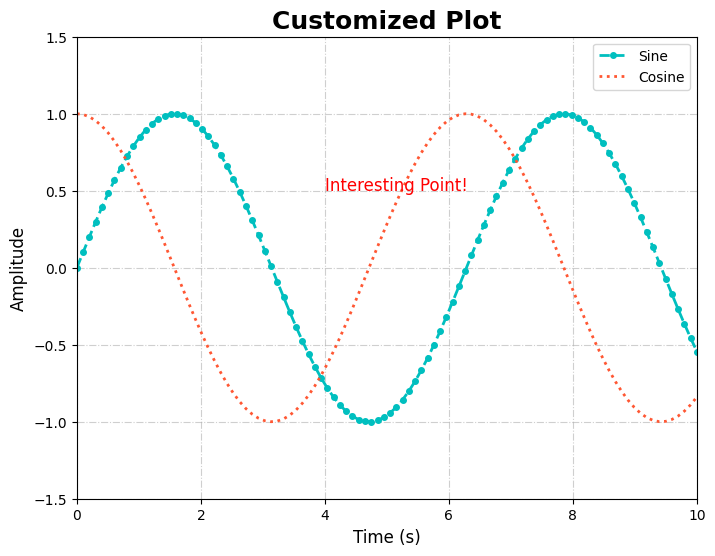

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot two lines on the same Axes
ax.plot(x, y, color='c', linestyle='--', linewidth=2, marker='o', markersize=4, label='Sine')
ax.plot(x, z, color='#FF5733', linestyle=':', linewidth=2, label='Cosine') # Hex color code

# Customize axes and title
ax.set_title("Customized Plot", fontsize=18, fontweight='bold')
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Amplitude", fontsize=12)

# Set axis limits
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)

# Add a legend
ax.legend(loc='upper right')

# Add annotations
ax.text(4, 0.5, 'Interesting Point!', fontsize=12, color='red')
ax.grid(True, linestyle='-.', alpha=0.6)

plt.show()

## **5. Saving Plots to a File**
It's essential to know how to save your visualizations for reports, presentations, or websites. The Figure object has a savefig() method for this.
- **Syntax:** fig.savefig('filename.format', dpi=300, bbox_inches='tight')
- **'filename.format':** The name and format of the file. Matplotlib infers the format from the extension (e.g., .png, .jpg, .svg, .pdf).
    - **.png:** Good for web images (raster).
    - **.jpg:** Good for photos, can be lossy (raster).
    - **.pdf:** Good for documents (vector).
    - **.svg:** Scalable Vector Graphics, good for web and editing in vector software (vector).
- **dpi (dots per inch):** Controls the resolution of the saved image. 300 is a good standard for high quality.
- **bbox_inches='tight':** A very useful argument that automatically crops the saved figure to remove extra white space around the plot.

Plot saved as 'cosine_plot.png' and 'cosine_plot.pdf'


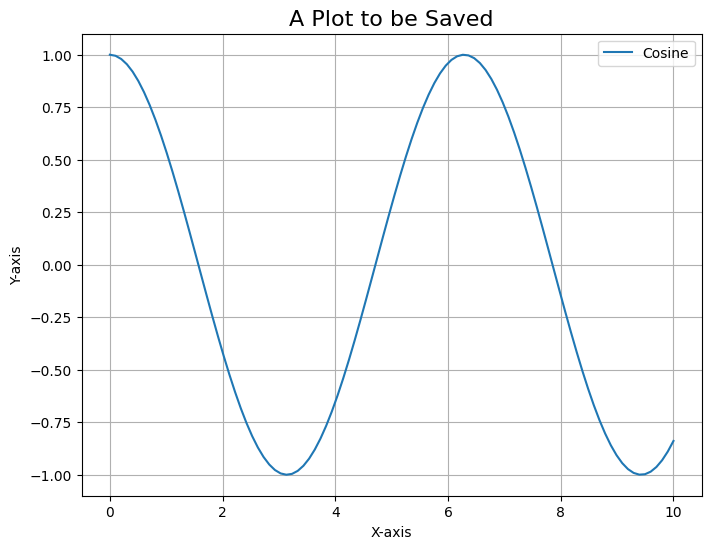

In [4]:
# --- Let's recreate a simple plot to save ---
fig, ax = plt.subplots(figsize=(8, 6))
x = np.linspace(0, 10, 100)
ax.plot(x, np.cos(x), label='Cosine')
ax.set_title("A Plot to be Saved", fontsize=16)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.grid(True)
ax.legend()

# --- Saving the plot ---
# Save as a high-resolution PNG file
# The file will be saved in the same directory as the notebook
fig.savefig("cosine_plot.png", dpi=300, bbox_inches='tight')

# Save as a scalable PDF file for documents
fig.savefig("cosine_plot.pdf", bbox_inches='tight')

print("Plot saved as 'cosine_plot.png' and 'cosine_plot.pdf'")

# It's good practice to call plt.show() *after* savefig
# in some backends to ensure the plot is fully rendered before saving.
plt.show()

## **6. Introduction to 3D Plotting**
Matplotlib can also create basic 3D plots. This requires an extra toolkit.
- The process:
    1. Import the Axes3D toolkit (even if not explicitly used, it registers the '3d' projection).
    2. When creating subplots, specify projection='3d'.
    3. Use the special ax.plot_surface(), ax.plot_wireframe(), ax.scatter(), etc., methods for 3D data.

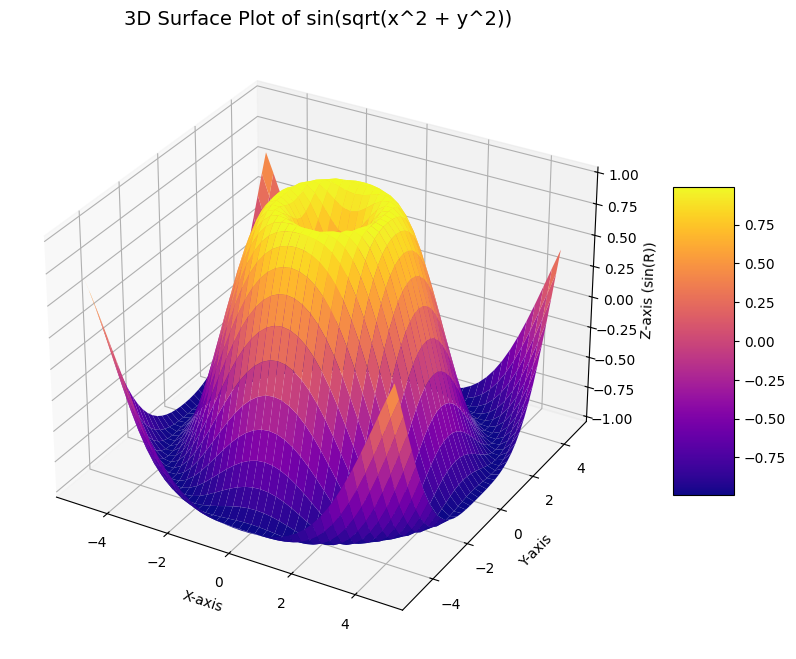

In [6]:
# --- Basic 3D Plotting ---
from mpl_toolkits.mplot3d import Axes3D # Import the 3D toolkit

# 1. Prepare 3D data
# We need X, Y, and Z coordinates. We'll create a meshgrid.
x_3d = np.arange(-5, 5, 0.25)
y_3d = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x_3d, y_3d) # Creates a coordinate matrix from coordinate vectors
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) # Z is a function of X and Y

# 2. Create a Figure and a 3D Axes object
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 3. Plot a surface
# The 'cmap' argument adds a color map to show height.
surface_plot = ax.plot_surface(X, Y, Z, cmap='plasma')

# 4. Customize the 3D plot
ax.set_title("3D Surface Plot of sin(sqrt(x^2 + y^2))", fontsize=14)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis (sin(R))")

# Add a color bar to map colors to values
fig.colorbar(surface_plot, shrink=0.5, aspect=5)

plt.show()

## **Exercises**

**1. Simple Line Plot:**
-  Create data for x from 0 to 2π (Hint: np.linspace(0, 2 * np.pi, 200)).
-  Create data for y1 as sin(x) and y2 as sin(2*x).
-  Using the Object-Oriented API (fig, ax = plt.subplots()), plot both y1 and y2 on the same Axes.
-  Customize the plot:
    - Give it a title: "Comparing Sine Waves".
    - Label the x-axis "Angle [rad]" and the y-axis "Magnitude".
    - Add a legend to distinguish between "sin(x)" and "sin(2x)".
    - Add a grid.

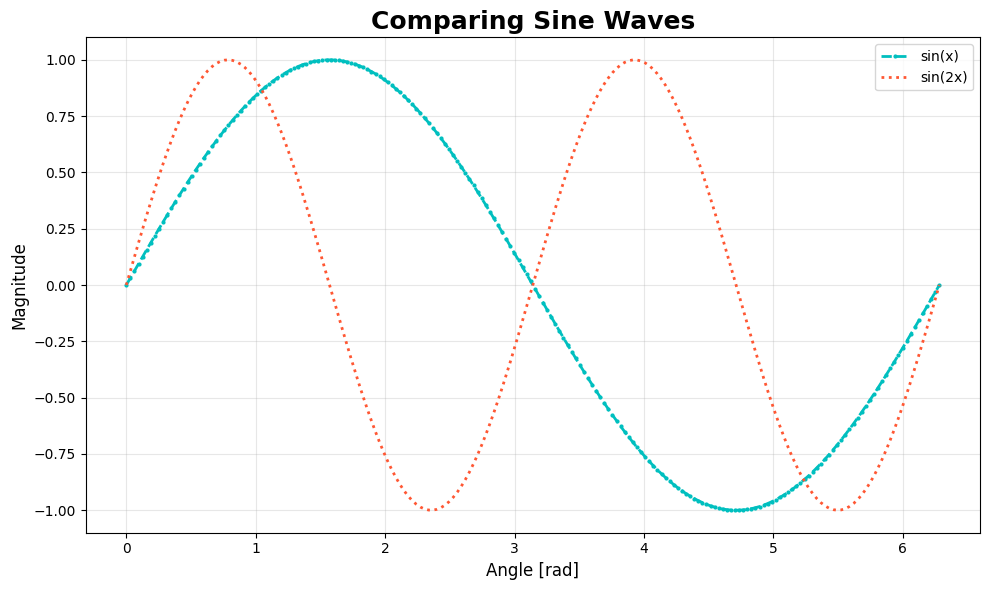

In [6]:
x = np.linspace(0, 2 * np.pi, 200)
y1 = np.sin(x)
y2 = np.sin(2*x)

fig, ax = plt.subplots(figsize =(10, 6))
ax.plot(x, y1, color= 'c', linestyle = '--', linewidth = 2, marker = 'o', markersize = 2, label = 'sin(x)')
ax.plot(x, y2, color = '#FF5733', linestyle = ':', linewidth = 2, label = 'sin(2x)')

ax.set_title('Comparing Sine Waves', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Angle [rad]', fontsize = 12)
ax.set_ylabel('Magnitude', fontsize = 12)

ax.legend(loc = 'upper right')
ax.grid(True, alpha = 0.3)

plt.tight_layout()
plt.show()

**2. Subplots with Different Plot Types:**
- Create a figure with two subplots, arranged vertically (nrows=2, ncols=1). Make the figure size appropriate (e.g., figsize=(8, 10)).
- Top Plot (Bar Chart): Create a bar chart showing the number of students in different majors: {'Computer Science': 150, 'Physics': 75, 'Mathematics': 110, 'Engineering': 200}. Give it a title.
- Bottom Plot (Histogram): Generate 1000 random numbers from a normal distribution (np.random.randn(1000)). Create a histogram of this data with 50 bins. Give it a title.

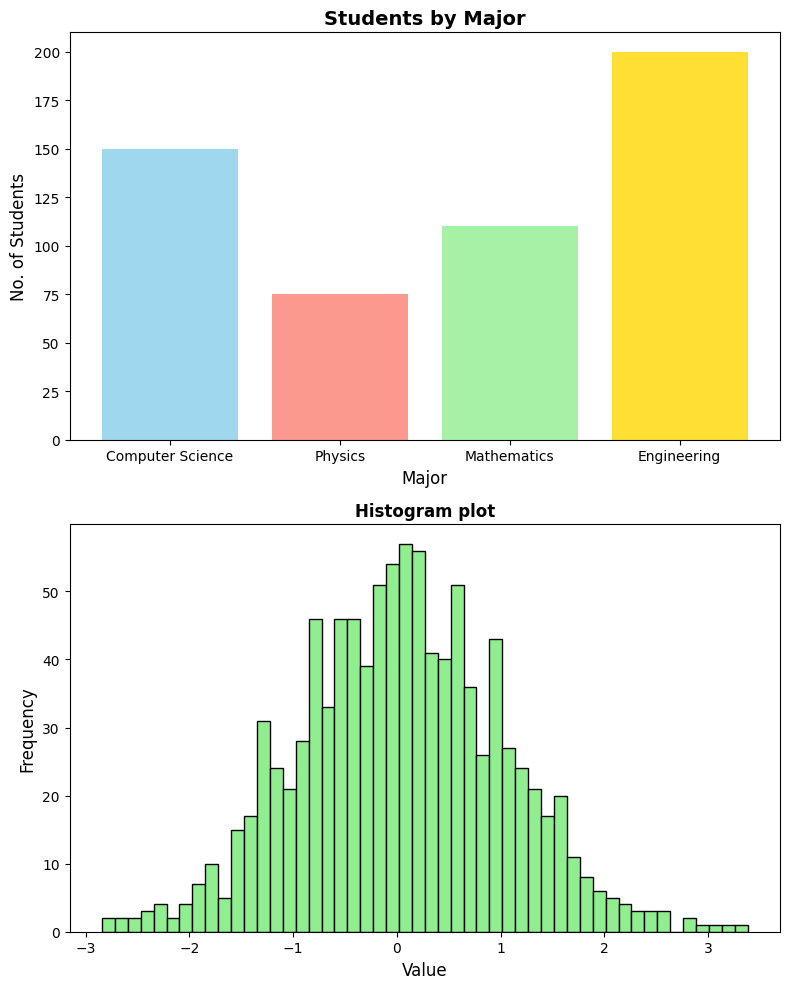

In [7]:
fig, ax = plt.subplots(2, 1, figsize= (8,10))

# Bar Chart
students = {
    'Computer Science': 150,
    'Physics': 75,
    'Mathematics': 110,
    'Engineering': 200
}
ax[0].bar(students.keys(), students.values(), color = ['skyblue', 'salmon', 'lightgreen', 'gold'], alpha= 0.8)
ax[0].set_title('Students by Major', fontsize = 14, fontweight = 'bold')
ax[0].set_xlabel('Major', fontsize = 12)
ax[0].set_ylabel('No. of Students', fontsize = 12)

# Histogram
data = np.random.randn(1000)
ax[1].hist(data, bins = 50, color = 'lightgreen', edgecolor =  'black')
ax[1].set_title('Histogram plot', fontsize = 12, fontweight = 'bold')
ax[1].set_xlabel('Value', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

**3. Scatter Plot with Customizations:**
- Create two sets of 50 random data points for x and y coordinates.
- Create a third set of 50 random integers between 10 and 200 to represent the size of the points.
- Create a fourth set of 50 random floats between 0 and 1 to represent the color of the points.
- Using the OO API, create a scatter plot (ax.scatter) where:
    - x and y are the coordinates.
    - s is the size array.
    - c is the color array.
    - cmap is a colormap, like 'viridis' or 'plasma'.
    - alpha is set to 0.7 for some transparency.
- Add a colorbar to the figure to show what the colors represent (fig.colorbar(scatter_plot_object)).
- Give the plot a title and axis labels.

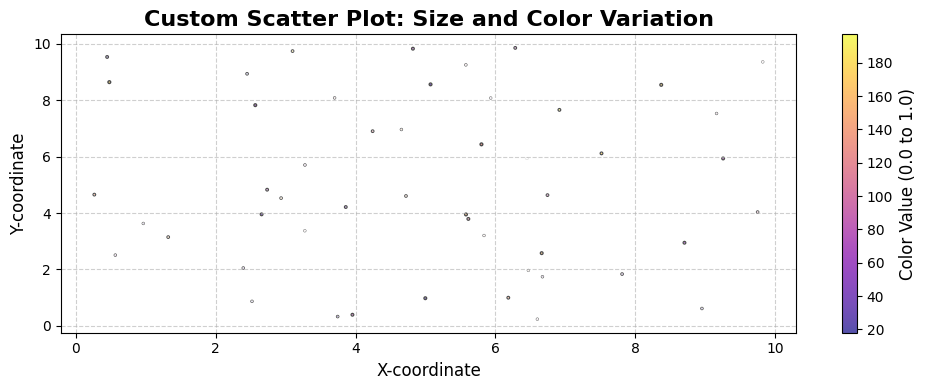

In [21]:
x_coords = np.random.rand(50) * 10 # Random floats between 0 and 10
y_coords = np.random.rand(50) * 10 # Random floats between 0 and 10

sizes = np.random.randint(10, 201, 50) # Random integers from 10 to 200

colors = np.random.rand(50)
fig, ax = plt.subplots(figsize=(10, 4))
scatter_plot = ax.scatter(x_coords, y_coords, colors, sizes, cmap =  'plasma', alpha = 0.7, edgecolor = 'black', linewidth = 2)
cbar = fig.colorbar(scatter_plot, ax=ax)
cbar.set_label('Color Value (0.0 to 1.0)', fontsize=12)

ax.set_title('Custom Scatter Plot: Size and Color Variation', fontsize=16, fontweight='bold')
ax.set_xlabel('X-coordinate', fontsize=12)
ax.set_ylabel('Y-coordinate', fontsize=12)

ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()